Loading the IMDB dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-08-09 04:32:56.672941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 04:32:56.975358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 04:32:56.976941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 04:32:58.980656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Encoding the integer sequences into a binary matrix

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model definition

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-08-09 04:37:15.868595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Setting aside a validation set

In [7]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [8]:
# compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [9]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2023-08-09 04:37:34.710084: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


29/30 [============================>.] - ETA: 0s - loss: 0.5383 - acc: 0.7751

2023-08-09 04:37:37.115910: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 51ms/step - loss: 0.5369 - acc: 0.7763 - val_loss: 0.4121 - val_acc: 0.8595
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3386 - acc: 0.8911 - val_loss: 0.3237 - val_acc: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2573 - acc: 0.9153 - val_loss: 0.2889 - val_acc: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2077 - acc: 0.9313 - val_loss: 0.2815 - val_acc: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1746 - acc: 0.9422 - val_loss: 0.2758 - val_acc: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1493 - acc: 0.9516 - val_loss: 0.2832 - val_acc: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1289 - acc: 0.9603 - val_loss: 0.3271 - val_acc: 0.8727
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1117 - acc: 0.9656 

Plotting the training and validation loss

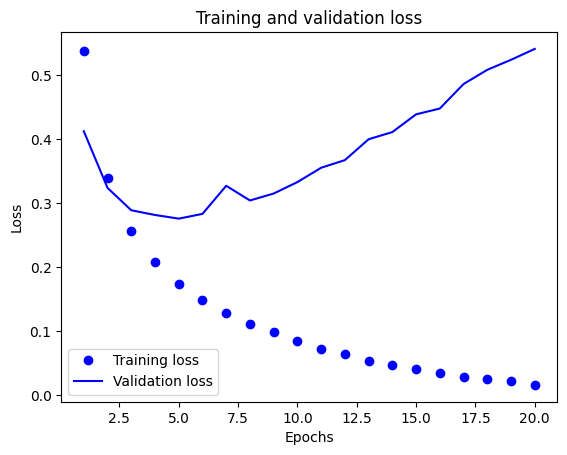

In [10]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

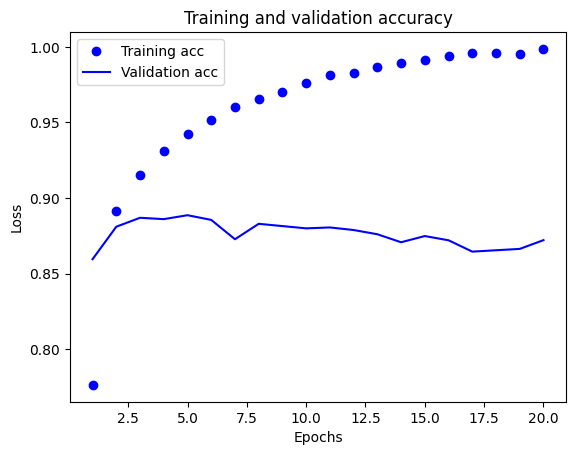

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x_test, y_test)
results

 24/782 [..............................] - ETA: 1s - loss: 0.6228 - acc: 0.8503 

2023-08-09 04:38:11.890525: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 2s 2ms/step - loss: 0.5805 - acc: 0.8588


[0.5804811120033264, 0.8588399887084961]

In [ ]:
prediction = model.predict(x_test)
prediction